## Descriptive Data Analysis

### Libraries import

In [1]:
import numpy as np
import pandas as pd
import statistics as stat
import math
import seaborn as sns
from matplotlib.pylab import plt
import scipy

### Data Importing & wrangling

In [3]:
#Reason for choosing this dataset:

''' The dataset contains fatal police shootings since 2015 till date and supporting factors 
pertaining to criminals' behavior

I found this interesting as I am generally interested in criminal thriller genre and
wanted to get my hands dirty on this data
'''

" The dataset contains fatal police shootings since 2015 till date and supporting factors \npertaining to criminals' behavior\n\nI found this interesting as I am generally interested in criminal thriller genre and\nwanted to get my hands dirty on this data\n"

In [2]:
shootings=pd.read_csv(r"fatal-police-shootings-data.csv")
pd.set_option('precision',3)

In [9]:
shootings.dtypes[shootings.dtypes==object]

name               object
date               object
manner_of_death    object
armed              object
gender             object
race               object
city               object
state              object
threat_level       object
flee               object
dtype: object

In [10]:
shootings.nunique()

id                         6953
name                       6626
date                       2380
manner_of_death               2
armed                        98
age                          80
gender                        2
race                          6
city                       2932
state                        51
signs_of_mental_illness       2
threat_level                  3
flee                          4
body_camera                   2
longitude                  5655
latitude                   5032
is_geocoding_exact            2
dtype: int64

In [5]:
shootings.rename(columns={'id':'criminal_id'},inplace=True)
shootings=shootings.astype({'criminal_id':str})
shootings.head()

,criminal_id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,longitude,latitude,is_geocoding_exact
0,3,Tim Elliot,2015-01-02,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False,-123.122,47.247,True
1,4,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False,-122.892,45.487,True
2,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False,-97.281,37.695,True
3,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False,-122.422,37.763,True
4,9,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False,-104.692,40.384,True


### Data clean-up & Imputation

###### Eliminating the null values of age and replacing (or) imputing them by median age as it's the central tendency that's least affected by outliers

In [6]:
#Cleaning the only numerical field age and checking if all the null and NaN values are eliminated

clean_age=[i for i in shootings.age if math.isnan(i)==False]

if len(shootings.age)-len(clean_age)==(shootings.age.isnull().sum()):
    print(f'There are {shootings.age.isnull().sum()} null values and there are {len(clean_age)} not null age value.'
          f'\nThis is {shootings.age.isnull().sum()*100/shootings.age.sum():.3f}% null values')

#Updating null values of age with median of the non zero values in the age column 
shootings['age_imputed'] = np.where(shootings['age'].isnull(),stat.median(clean_age),shootings['age'])

#Quality check: The null values of age is replaced by median age field 
shootings[shootings['age'].isnull()].head()

There are 361 null values and there are 6592 not null age value.
This is 0.147% null values


,criminal_id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,longitude,latitude,is_geocoding_exact,age_imputed
127,584,Alejandro Salazar,2015-02-20,shot,gun,NaN,M,H,Houston,TX,False,attack,Car,False,-95.401,29.983,True,35.0
769,908,Jason Day,2015-10-12,shot,gun,NaN,M,B,Lawton,OK,False,attack,Not fleeing,False,-98.422,34.599,True,35.0
809,1283,John Tozzi,2015-10-24,shot,gun,NaN,M,NaN,New Paltz,NY,False,attack,Not fleeing,False,-74.080,41.747,True,35.0
819,964,Deaunte Lamar Bell,2015-10-29,shot,gun,NaN,M,B,Columbus,OH,False,other,Not fleeing,False,-82.863,39.922,True,35.0
932,1074,NaN,2015-12-10,shot,gun,NaN,M,NaN,Hemet,CA,False,attack,Not fleeing,False,-116.971,33.729,True,35.0


###### Selecting some of the required columns

The reason for eliminating a few columns is mentioned below:

1) name: It's a character column and anyway the ID field uniquely identifies every criminal

2) race: This seems unnecessary and I don't personally want to classify criminals based on race

3) threat & flee: doesn't seem to have useful info as I had checked the unique records of this column

4) body_camera: Not planning to have hypotheses and insights based on this field

5) latitude & longitude: I will explore & plotting geospatial data in later sessions  

In [7]:
#Selecting the required columns by using dataframe column subset
shootings=shootings[['criminal_id','date','manner_of_death','armed','age_imputed','gender','city','state'
                     ,'signs_of_mental_illness','body_camera']]

In [8]:
#Takeaway
'''Here, imputation (replacing the null values by central tendencies) is done because there's only
   0.147% of missing values in the ages field and imputing will not change the overall distribution
   The missing values can also be eliminated safely because of lesser datapoints'''

"Here, imputation (replacing the null values by central tendencies) is done because there's only\n   0.147% of missing values in the ages field and imputing will not change the overall distribution\n   The missing values can also be eliminated safely because of lesser datapoints"

###### Finding descriptive statistics by formula

In [9]:
#Using one function to get all the central tendencies and variability,
#Furthermore, will try exploring and calculating them by methods 
shootings.describe()

,age_imputed
count,6953.000
mean,37.027
std,12.640
min,6.000
25%,28.000
50%,35.000
75%,45.000
max,92.000


In [10]:
#Takeaway:
'''From a basic glance of the central tendencies and variability measures, the mean is greater than median.
So, it's a right skewed distribution'''

"From a basic glance of the central tendencies and variability measures, the mean is greater than median.\nSo, it's a right skewed distribution"

### Computing central tendencies

###### Mean = Average of all datapoints

In [11]:
#Making the age field a list as printf doesn't allow []
age_imputed_list=list(shootings['age_imputed'])

#Finding mean of the age column formula (age is the only numerical field)
def average_function(list):
    return round(sum(list)/len(list),3)

#Here, the results aren't stored in any variable to save memory space and efficiency
print('Computing mean:\n---------------------')
print(f'Mean on computing by formula is     {round(sum(age_imputed_list)/len(age_imputed_list),3)}') #Computing using formula method
print(f'Mean using statistics package is    {stat.mean(age_imputed_list):.3f}') #Computing using external package
print(f'Mean using numpy package is         {np.mean(age_imputed_list):.3f}') #Computing using external package
print(f'Mean using user defined function is {average_function(age_imputed_list)}') #Computing using ser defined function


Computing mean:
---------------------
Mean on computing by formula is     37.027
Mean using statistics package is    37.027
Mean using numpy package is         37.027
Mean using user defined function is 37.027


###### Median  = Middle value

In [12]:
#Finding median of the age column formula (age is the only numerical field)
def median_function(list):
    list.sort()
    if len(list)%2==0:
        return (list[int(len(list)/2)]+list[int((len(list)/2)-1)])/2
    if len(list)%2!=0:
        return list[int(len(list)/2)]

#Here, the results aren't stored in any variable to save memory space and efficiency
print('Computing median:\n-----------------')
print(f'The median of age using statistics package is:{stat.median(age_imputed_list):10}')
print(f'The median of age using numpy package is:{np.median(age_imputed_list):15}')
print(f'Median age using user defined function is: {median_function(age_imputed_list):13}')

Computing median:
-----------------
The median of age using statistics package is:      35.0
The median of age using numpy package is:           35.0
Median age using user defined function is:          35.0


###### Mode = Datapoint containing the maximum frequency value

In [13]:
#Finding mode of the age column formula (age is the only numerical field)
def mode_function(list):
    value,frequency=np.unique(np.array(list),return_counts=True)
    value_freq=dict(zip(frequency,value))
    max_freq_value=max(sorted(value_freq,reverse=True))
    return value_freq[max_freq_value]


print('Computing mode:\n-----------------')
print(f'The mode of age using statistics package is:{stat.mode(age_imputed_list):10}')
print(f'The mode using user defined function is:          {mode_function(age_imputed_list)}')

Computing mode:
-----------------
The mode of age using statistics package is:      35.0
The mode using user defined function is:          35.0


### Computing variability measures

###### range = Max(values) - Min(values)

In [14]:
print('Range computation\n-----------------')
print(f'The range of age using built-in function is:{max(age_imputed_list)-min(age_imputed_list):10}')
print(f'The range of age using numpy package is:{np.max(age_imputed_list)-np.min(age_imputed_list):14}')

Range computation
-----------------
The range of age using built-in function is:      86.0
The range of age using numpy package is:          86.0


###### Inter Quartile Range (IQR) = 3rd Quartile - 1st Quartile 

In [15]:
print('IQR Computation\n---------------')
print(f'Computing using numpy package and percentile: {np.percentile(age_imputed_list,75)-np.percentile(age_imputed_list,25)}')
print(f'Computing using scipy package:                {scipy.stats.iqr(age_imputed_list)}')

IQR Computation
---------------
Computing using numpy package and percentile: 17.0
Computing using scipy package:                17.0


###### Variance = Sum of squares of all the deviation of datapoints from mean

###### Standard Deviation = Square root of variance

In [16]:
def std_dev_function(list):
    mean=sum(list)/len(list)
    deviation_list=[(var-mean)**2 for var in list]
    variance=sum(deviation_list)/len(list)
    std_dev=variance**(1/2)
    return variance,std_dev


print('Computing variance:\n-------------------')
print(f'Variance using statistics package is:    {stat.pvariance(age_imputed_list):.3f}')
print(f'Variance using user defined function is: {std_dev_function(age_imputed_list)[0]:.3f}')

print('\n')
print('Computing standard deviation:\n-------------------')
print(f'Standard deviation using statistics package is:    {stat.pstdev(age_imputed_list):.3f}')
print(f'Standard deviation using user defined function is: {std_dev_function(age_imputed_list)[1]:.3f}')


Computing variance:
-------------------
Variance using statistics package is:    159.737
Variance using user defined function is: 159.737


Computing standard deviation:
-------------------
Standard deviation using statistics package is:    12.639
Standard deviation using user defined function is: 12.639


### Hypothesis testing & Descriptive Analysis

#### A Structured analysis could be done by framing hypothesis & questions surrounding the data so that later on the assumptions can be proven or misproven

Hypotheses (or) questions planning to test out with data in this assignment:

    1) --Most criminals might be mid age
       --Check distribution by gender to check for any insights

    2) California might have the highest killings as per statistics
    
    3) People showing signs of mental illness might be tasered prior to death
    
    
Other questions for next phase:

    1) Is there any relationship months of the year when more killings have happened?
    
    2) Which city had the most number of fatal police shot?
    
    3) Armed criminals are usually directly shot



### Hypothesis 1: Most criminals might be young

'Takeaway: Most criminals seem to lie in the age group of 30-40, \nThere are some criminals below 20 as well'

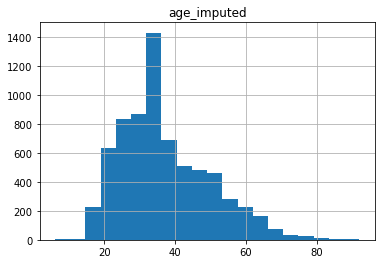

In [17]:
shootings.hist('age_imputed',bins=20)
'''Takeaway: Most criminals seem to lie in the age group of 30-40, 
There are some criminals below 20 as well'''

Text(0.5, 1.0, 'Box plot of age distribution by Gender')

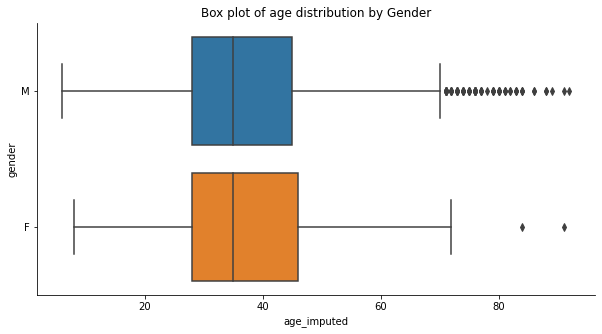

In [18]:
#Calculating mean age by gender
fig, ax = plt.subplots(1,1, figsize=(10, 5))
a=sns.boxplot(x = 'age_imputed', y = 'gender', data = shootings, ax = ax)
sns.despine()
a.set_title('Box plot of age distribution by Gender')

In [19]:
#takeaway:
'''1) Most of the population above 70 years seem to be male
   2) With respect to age, male as well as female seem to show a similar behavior
   Next steps:
   Check the distribution of male vs female to validate the understanding'''

'1) Most of the population above 70 years seem to be male\n   2) With respect to age, male as well as female seem to show a similar behavior\n   Next steps:\n   Check the distribution of male vs female to validate the understanding'

'Takeaway: There seems to be very minimal female'

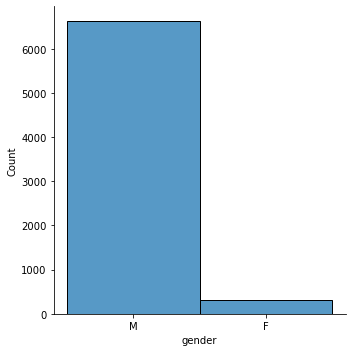

In [20]:

sns.displot(shootings,x='gender',)
'''Takeaway: There seems to be very minimal female'''

In [21]:
#Getting the count & percentage of male and female
def count_field(a,b,parameter):
    count_a=0
    count_b=0
    for i in shootings[parameter]:
        if i==a:
            count_a+=1
        else:
            count_b+=1
    return (count_a,count_b)

print('The count of (male,female):\t',count_field('M','F','gender'))
female_percent=count_field('M','F','gender')[1]*100/(count_field('M','F','gender')[0]+count_field('M','F','gender')[1])
male_percent=count_field('M','F','gender')[0]*100/(count_field('M','F','gender')[0]+count_field('M','F','gender')[1])
print(f'Percentage of Male:   {round(male_percent,2)}%\nPercentage of Female:  {round(female_percent,2)}%')

The count of (male,female):	 (6627, 326)
Percentage of Male:   95.31%
Percentage of Female:  4.69%


### Hypothesis 3: California has the highest number of kills as per the statistics

In [22]:
a=shootings['state'].value_counts()
print(a.to_frame().head())
print("... ...")
print(a.to_frame().tail())

    state
CA   1020
TX    612
FL    447
AZ    313
GA    256
... ...
    state
WY     16
DE     16
ND     15
VT     11
RI      5


In [23]:
#Takeaway: Hypothesis is validated
'''1) California and Texas seem to be the places with top fatal police killings
   2) Vermount and Rhode Island seem to be the places with the least fatal police killings
   3) These results of top killings seem to be in line with the state population
      URL: https://worldpopulationreview.com/states
      
      Population of California in 2022: ~ 39M
      Population of Texas in 2022:      ~ 30M
'''

'1) California and Texas seem to be the places with top fatal police killings\n   2) Vermount and Rhode Island seem to be the places with the least fatal police killings\n   3) These results of top killings seem to be in line with the state population\n      URL: https://worldpopulationreview.com/states\n      \n      Population of California in 2022: ~ 39M\n      Population of Texas in 2022:      ~ 30M\n'

### Hypothesis 3: People showing signs of mental illness might be tasered and shot

In [24]:
#Checks: Checking the unique values in the mental illness field
shootings.signs_of_mental_illness.unique()

array([ True, False])

22.16% of criminals show signs of mental illness!


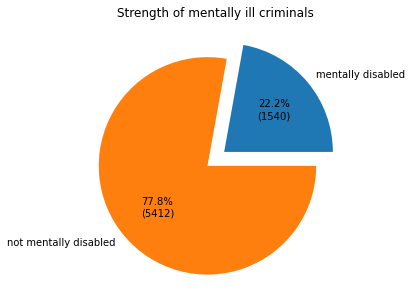

In [25]:
#plot histogram to get an understanding of people with mental illness
data=[count_field(True,False,'signs_of_mental_illness')[0],count_field(True,False,'signs_of_mental_illness')[1]]
label=['mentally disabled','not mentally disabled']
fig, ax = plt.subplots(figsize =(5, 5))

#To set percentage values and datalabels
def func(pct, allvalues):
    absolute = int(pct / 100.*np.sum(allvalues))
    return "{:.1f}%\n({:d})".format(pct, absolute)
plt.pie(data,labels=label,explode=(0.1,0.1),autopct = lambda pct: func(pct, data))
ax.set_title('Strength of mentally ill criminals')

Mentally_ill=count_field(True,False,'signs_of_mental_illness')[0]
Not_Mentally_ill=count_field(True,False,'signs_of_mental_illness')[1]
print(f'{Mentally_ill*100/(Mentally_ill+Not_Mentally_ill):.2f}% of criminals show signs of mental illness!')

In [26]:
#Takeaway:
''' Majority of the criminal population do not show any signs of mental illness'''

' Majority of the criminal population do not show any signs of mental illness'

In [27]:
#Further analysis required - bivariate:
''' Find the percentage of tasered and shot people with repect to overall people who are shot 
and compare with distribution of signs of mental illness - bivariate analysis''' 

' Find the percentage of tasered and shot people with repect to overall people who are shot \nand compare with distribution of signs of mental illness - bivariate analysis'

##### Next steps:
'Test the further questions and hypotheses'

Other questions for next phase:

    1) Is there any relationship months of the year when more killings have happened?
    
    2) Which city had the most number of fatal police shot?
    
    3) Are armed criminals directly shot?


#### Important Take-away:
#### Decisions that could be taken from a holistic analysis with the mentioned next steps:

Since, the entire analysis dwells on descriptive analytics and not prescriptive, we can't for sure suggest something from these results.

However, we can get a fair idea on various data oriented profiling of criminals (age,gender,mental state,etc.) and thereby
make this a base for further predictive analytics

### Thank you!